In [2]:
import numpy as np
from scipy.integrate import solve_ivp
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.optimize import minimize
from scipy.optimize import curve_fit

# import cupy as cp

In [3]:
t_min = 0
t_end = 24 * 6

動かせる範囲
- Ser
    - 動かせる
    - いったん正の範囲
    - 感覚的には 0~1000
- X_max
    - 動かせる
    - 1.3*1e6 が最大値

- K_ser
    - 動かない
- P
    - 動かない

# SRIP Producing Cell

In [14]:
# # 微分方程式の定義
# def model(t, X):
#     dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser)
#     return dXdt

# # solve_ivpを使用して微分方程式を解く
# sol_cell = solve_ivp(model, [t_min, t_end], [X0], t_eval=np.linspace(t_min, t_end, 1000))

# # 結果のプロット
# plt.plot(sol_cell.t, sol_cell.y[0])
# plt.xlabel('Time')
# plt.ylabel('X')
# plt.title('Simulation of the differential equation')
# plt.grid(True)
# plt.show()

# DNA & RNA

In [27]:
# # 微分方程式系の定義
# def model(t, y):
#     DNA, RNA = y
#     dDNAdt = -k_DNA * DNA
#     dRNAdt = k_s * DNA - k_dRNA * RNA
    
#     return [dDNAdt, dRNAdt]

# # solve_ivpを使用して微分方程式系を解く
# sol_rna = solve_ivp(model, [t_min, t_end], [DNA0, RNA0], t_eval=np.linspace(t_min, t_end, 1000))

# # 結果のプロット
# plt.plot(sol_rna.t, sol_rna.y[0], label='DNA')
# plt.plot(sol_rna.t, sol_rna.y[1], label='RNA')
# plt.xlabel('Time')
# plt.ylabel('Concentration')
# plt.title('Simulation of the differential equation system')
# plt.legend()
# plt.grid(True)
# plt.show()

# SRIP

In [28]:
# # RNAとXの値が格納されているndarray
# # これらは前に計算された値であると仮定します
# RNA_values = sol_rna.y[1]  # RNAの値を適切に設定してください
# X_values = sol_cell.y[0]  # Xの値を適切に設定してください

# # 微分方程式系の定義
# def model(t, SRIP):
#     # 時間tにおけるRNAとXの値を取得
#     idx = np.searchsorted(sol_rna.t, t, side='right') - 1
#     RNA = RNA_values[idx]
#     X = X_values[idx]
    
#     # SRIPの微分方程式
#     # dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X - k_a * SRIP * X
#     dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
#     return dSRIPdt

# # solve_ivpを使用して微分方程式系を解く
# sol = solve_ivp(model, [t_min, t_end], [SRIP0], t_eval=np.linspace(t_min, t_end, 1000))

# # 結果のプロット
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(sol.t, sol.y[0], label='SRIP')
# ax.set_xlabel('Time')
# ax.set_ylabel('Concentration')
# ax.set_title('Simulation of the differential equation system')
# ax.axvline(x=48, color='b')
# ax.axvline(x=72, color='b')
# ax.set_ylim(0, 5e7)


# plt.legend()
# plt.grid(True)
# plt.show()

# まとめて

x = SRIP
dx/dt = k_{vp} * X - k_a * X * x
dx/dt + (k_a * X) * x = k_{vp} * X
x(t) = C*exp(-(k_a * X)t) + hoge
hoge = X*10^5

In [55]:
math.log(2)/24 * 60

1.732867951399863

In [49]:
P = math.log(2)/24
X_max = 1.3e6
Ser = 1
K_ser = 1
k_DNA = math.log(2)/24
k_s = 3e-3
k_dRNA = 3e-2
k_vp = 1e-2
K_RNA = 2e5f
const = 1.8e-2


X0 = 2e5  # Xの初期値を適切に設定してください
# DNA0 = 5.5 * 1e4  # Okumura
DNA0 = 2.0 * 1e11

DNA0 = DNA0 / X0 * 0.8
RNA0 = 0.0  # Okumura
SRIP0 = 0.0  # SRIPの初期値を適切に設定してください
y0 = [X0, DNA0, RNA0, SRIP0]

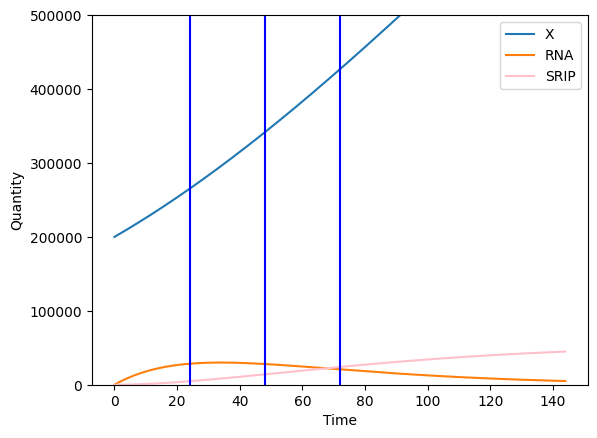

In [50]:
# 微分方程式系の定義
def model(t, y):
    X, DNA, RNA, SRIP = y
    if X < 0:
        X = 0
    dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser) - const * SRIP
    dDNAdt = -k_DNA * DNA
    dRNAdt = k_s * DNA - k_dRNA * RNA
    dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
    return [dXdt, dDNAdt, dRNAdt, dSRIPdt]

# solve_ivpを使って数値解を求める
sol = solve_ivp(model, [t_min, t_end], y0, t_eval=np.linspace(t_min, t_end, 1000))

# グラフ描画
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sol.t, sol.y[0], label='X')
# ax.plot(sol.t, sol.y[1], label='DNA')
ax.plot(sol.t, sol.y[2], label='RNA')
ax.plot(sol.t, sol.y[3], label='SRIP', color='pink')

ax.axvline(x=24, color='b')
ax.axvline(x=24*2, color='b')
ax.axvline(x=24*3, color='b')

ax.legend(loc='best')
ax.set_xlabel('Time')
ax.set_ylabel('Quantity')
ax.set_ylim(0, 5e5)
plt.show()

# パラメータで比較

In [ ]:
params = [
    # P,             X_max, Ser, K_Ser, k_DNA,          k_s,  k_dRNA, k_vp, K_RNA, k_t
    [math.log(2)/24, 1.3e6, 1,   1,     math.log(2)/24, 3e-3, 3e-2,   1e-2, 2e3, 1.8e-2],
    [math.log(2)/24, 1.0e6, 1,   1,     math.log(2)/24, 3e-3, 3e-2,   1e-2, 2e3, 1.8e-2],
    [math.log(2)/24, 0.7e6, 1,   1,     math.log(2)/24, 3e-3, 3e-2,   1e-2, 2e3, 1.8e-2]
    ]

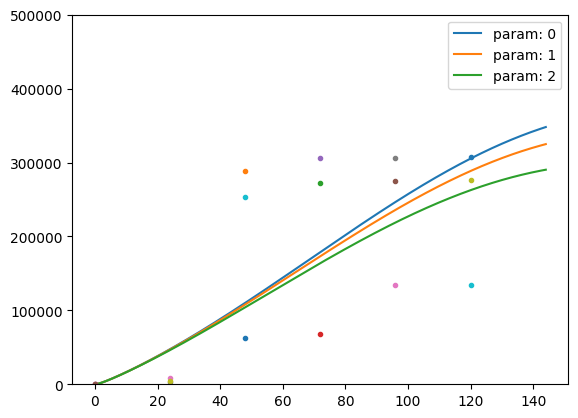

In [67]:
def model(t, y, P, X_max, Ser, K_ser, k_DNA, k_s, k_dRNA, k_vp, K_RNA, k_t):
    X, DNA, RNA, SRIP = y
    if X < 0:
        X = 0
    dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser) - k_t * SRIP
    dDNAdt = -k_DNA * DNA
    dRNAdt = k_s * DNA - k_dRNA * RNA
    dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
    return [dXdt, dDNAdt, dRNAdt, dSRIPdt]

results = []

for param in params:
    P, X_max, Ser, K_ser, k_DNA, k_s, k_dRNA, k_vp, K_RNA, k_t = param
    results.append(solve_ivp(model, [t_min, t_end], y0, args=(P, X_max, Ser, K_ser, k_DNA, k_s, k_dRNA, k_vp, K_RNA, k_t), t_eval=np.linspace(t_min, t_end, 1000), method='RK45'))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(len(results)):
    ax.plot(results[i].t, results[i].y[3], label=f'param: {i}')

for i in range(6):
    datum = data[i]
    for j in range(len(data[i])):
        ax.plot(24 * i, datum[j], '.')

ax.set_ylim(0, 5e5)
ax.legend()

# fitting to experiment data

In [65]:
data = pd.read_csv('experiment.csv')
data = [[0] + data[str(i)].to_list()[:6] for i in range(1, 4)]
data = [[data[0][i], data[1][i], data[2][i]] for i in range(6)]
# data = [[data[0][i], data[2][i]] for i in range(6)]

data = np.cumsum(data, axis=0)
data

array([[     0.       ,      0.       ,      0.       ],
       [  8639.484308 ,   3599.785128 ,   5039.69918  ],
       [253424.873008 ,  62636.261228 , 287982.81028  ],
       [272863.712698 ,  68395.917433 , 305981.73592  ],
       [275023.583775 , 134631.963793 , 306701.6929457],
       [276463.497826 , 134631.963793 , 307421.6499714]])

In [8]:
data[:, 0]

array([     0.      ,   8639.484308, 253424.873008, 272863.712698,
       275023.583775, 276463.497826])

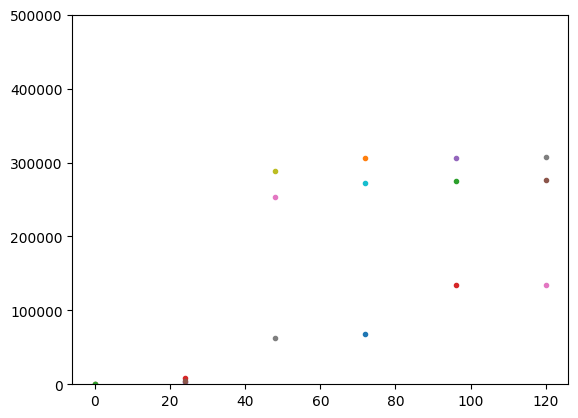

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(6):
    datum = data[i]
    for j in range(len(data[i])):
        ax.plot(24 * i, datum[j], '.')
ax.set_ylim(0, 5e5)
plt.show()

In [10]:
# # 実験データ
# t_data = np.array([24*i for i in range(6)])  # 実験データの時間点

# # 微分方程式系の定義
# def model(t, y, Ser, X_max, k):
#     X, DNA, RNA, SRIP = y
#     if X < 0:
#         X = 0
#     dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser) - const * SRIP
#     dDNAdt = -k_DNA * DNA
#     dRNAdt = k_s * DNA - k_dRNA * RNA
#     # dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X - k_a * SRIP * X
#     dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
#     return [dXdt, dDNAdt, dRNAdt, dSRIPdt]

# # 誤差関数の定義
# def objective(params):
#     Ser, X_max, k = params
#     sol = solve_ivp(model, [t_min, t_end], y0, args=(Ser, X_max, k), t_eval=t_data, method='RK45')

#     model_output = sol.y[-1] # SRIP
#     experiment_data = np.mean(SRIP_data, axis=1)
    
#     error = np.sum((model_output - experiment_data) ** 2)
    
#     return error


# # 最適化の実行
# initial_params = [10, 1.0e6, 0.25] # Ser, X_max, k
# y0 = [0.2 * 1e6, 2.0 * 1e11, 0.0, 0]  # X, DNA, RNA, SRIP

# result = minimize(objective, initial_params, bounds=[(0, 1e3), (0, 1.3 * 1e6), (0, 1)])
# optimized_params = result.x

In [11]:
# 実験データの準備 (例としてダミーデータ)
SRIP_data = np.random.randn(6, 5) * 1e6
t_data = np.array([24*i for i in range(6)])

# 微分方程式系の定義
def model(t, y, Ser, X_max, k):
    X, DNA, RNA, SRIP = y
    if X < 0:
        X = 0
    dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser) - const * SRIP
    dDNAdt = -k_DNA * DNA
    dRNAdt = k_s * DNA - k_dRNA * RNA
    dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
    return [dXdt, dDNAdt, dRNAdt, dSRIPdt]

# curve_fit用の関数
def fit_function(t, Ser, X_max, k):
    sol = solve_ivp(model, [min(t), max(t)], y0, args=(Ser, X_max, k), t_eval=t, method='RK45')
    return sol.y[-1]

# curve_fitの実行
y0 = [X0, DNA0 / X0 * 0.8, RNA0, SRIP0] # X, DNA, RNA, SRIP
initial_guess = [10, 1.0e6, 0.25]
bounds = [(0, 1e3), (0, 1.3 * 1e6), (0, 1)]
# popt, _ = curve_fit(fit_function, t_data, np.mean(SRIP_data, axis=1), p0=initial_guess, bounds=np.array(bounds).T)
popt, _ = curve_fit(fit_function, t_data, data[:, 0], p0=initial_guess, bounds=np.array(bounds).T)


print("最適化されたパラメータ:", popt)

最適化されたパラメータ: [9.99999091e+02 1.29999887e+06 2.50000000e-01]


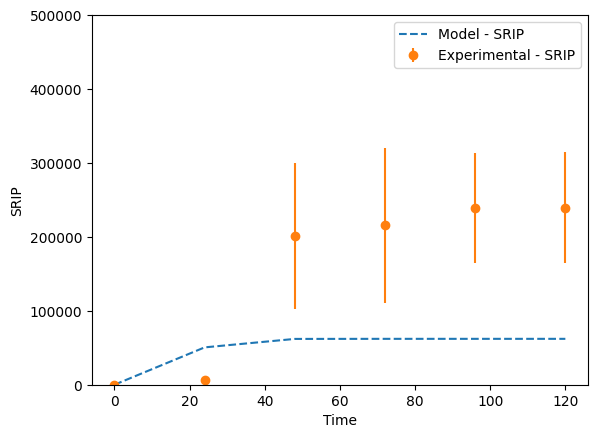

In [12]:
# solve_ivpで得られたシミュレーション結果をプロット
Ser, X_max, k = popt

# 微分方程式系の定義
def model(t, y, Ser, X_max, k):
    X, DNA, RNA, SRIP = y
    if X < 0:
        X = 0
    dXdt = P * X * (X_max - X) / X_max * Ser / (Ser + K_ser) - const * SRIP
    dDNAdt = -k_DNA * DNA
    dRNAdt = k_s * DNA - k_dRNA * RNA
    # dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X - k_a * SRIP * X
    dSRIPdt = k_vp * RNA / (RNA + K_RNA) * X
    
    return [dXdt, dDNAdt, dRNAdt, dSRIPdt]

y0 = [0.2 * 1e6, 2.0 * 1e11, 0.0, 0]  # X, DNA, RNA, SRIP
sol = solve_ivp(model, [t_min, t_end], y0, args=(Ser, X_max, k), t_eval=t_data, method='RK45')

# 実験データをプロット
# エラーバーを含める場合は、各サンプルの標準偏差や標準誤差を計算
mean_srip_data = np.mean(data, axis=1)  # 各時間点での平均値
std_srip_data = np.std(data, axis=1)  # 各時間点での標準偏差

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(sol.t, sol.y[-1], label='Model - SRIP', linestyle='dashed')
ax.errorbar(t_data, mean_srip_data, yerr=std_srip_data, fmt='o', label='Experimental - SRIP')

# グラフの設定
ax.set_xlabel('Time')
ax.set_ylabel('SRIP')
ax.legend(loc='best')
ax.set_ylim(0, 5e5)
plt.show()